In [120]:
import numpy as np
import pandas as pd
import random
import string

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [122]:
# Delcare a grid-world environment parameter value
grid_size = 4
num_actions = 4  # Four Actions are set: Up, Down, Left, Right arrow
gamma = 0.9  # Discount factor
alpha = 0.1  # Learning rate
epsilon = 0.1  # Exploration rate

In [123]:
# Initialize the Q Learning Table numpy array zeros 0's)
QLearningTable = np.zeros((grid_size, grid_size, num_actions))

In [124]:
print(QLearningTable)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]


In [125]:
QLearningTable.ndim

3

In [126]:
QLearningTable.shape

(4, 4, 4)

In [127]:
# Define rewards for the grid
rewards = np.full((grid_size, grid_size), -0.1)
print(rewards)

[[-0.1 -0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1 -0.1]]


In [128]:
#Set a goal in the (row)index = 3, coloum_index = 3)
goal_State = (3, 3)

#Set the Obstacles for for our agent actions
 #(up, down, right, left)

obstacles = [(1, 1), (1, 2), (2, 1)]
rewards[goal_State] = 1  # Goal state reward

In [129]:
for obstacle in obstacles:
    print("For Each obstcles/Penalty")
    print(obstacle)

    rewards[obstacle] = -1  # Obstacle penalty

    print("The rewards are")
    print(rewards)
    print("\n")

print("Final Rewards position are:\n")
print(rewards)

For Each obstcles/Penalty
(1, 1)
The rewards are
[[-0.1 -0.1 -0.1 -0.1]
 [-0.1 -1.  -0.1 -0.1]
 [-0.1 -0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1  1. ]]


For Each obstcles/Penalty
(1, 2)
The rewards are
[[-0.1 -0.1 -0.1 -0.1]
 [-0.1 -1.  -1.  -0.1]
 [-0.1 -0.1 -0.1 -0.1]
 [-0.1 -0.1 -0.1  1. ]]


For Each obstcles/Penalty
(2, 1)
The rewards are
[[-0.1 -0.1 -0.1 -0.1]
 [-0.1 -1.  -1.  -0.1]
 [-0.1 -1.  -0.1 -0.1]
 [-0.1 -0.1 -0.1  1. ]]


Final Rewards position are:

[[-0.1 -0.1 -0.1 -0.1]
 [-0.1 -1.  -1.  -0.1]
 [-0.1 -1.  -0.1 -0.1]
 [-0.1 -0.1 -0.1  1. ]]


In [130]:
# Define possible actions
actions = ['up', 'down', 'left', 'right']

In [131]:
# Function to determine the next state

def nextStateSpace(current_State, agentAction):
    row_index, col_index = current_State
    if agentAction == 'up' and row_index > 0:
        row_index = row_index - 1
    elif agentAction == 'down' and row_index < grid_size - 1:
        row_index = row_index + 1
    elif agentAction == 'left' and col_index > 0:
        col_index = col_index - 1
    elif agentAction == 'right' and col_index < grid_size - 1:
        col_index = col_index + 1
    return (row_index, col_index)

In [132]:
def QLearningAlgorithm(episodes):
    historyPlotValueQ = []

    for episode in range(episodes):
        state = (0, 0)
        while state != goal_State:
            if random.uniform(0, 1) < epsilon:
                actionIndex = random.randint(0, num_actions - 1)
            else:
                actionIndex = np.argmax(QLearningTable[state[0], state[1], :])
            action = actions[actionIndex]
            newState = nextStateSpace(state, action)
            reward = rewards[newState]

            # Update Q-value using the Q-learning formula Similarly Bellam Ford
            qTableNextStateValue = np.max(QLearningTable[newState[0], newState[1], :])
            QLearningTable[state[0], state[1], actionIndex] = QLearningTable[state[0], state[1], actionIndex] + alpha * (reward + gamma * qTableNextStateValue - QLearningTable[state[0], state[1], actionIndex])
            state = newState

        historyPlotValueQ.append(QLearningTable.copy())

    return QLearningTable, historyPlotValueQ

In [133]:
# Train the agent
trainEpoch = 10000
trained_Q_table, historyPlotValueQ = QLearningAlgorithm(trainEpoch)


In [134]:
# Output the Q-values and the learned policy
learnedPolicy = []

for row in range(grid_size):
    policyWiseLearnedRow = []
    for column in range(grid_size):
        highestQvalueIndex = np.argmax(trained_Q_table[row, column, :])
        print(highestQvalueIndex)
        correctLearnedActionList = actions[highestQvalueIndex]
        print(correctLearnedActionList)
        policyWiseLearnedRow.append(correctLearnedActionList)

    learnedPolicy.append(policyWiseLearnedRow)
    print(learnedPolicy)

# Convert the list of lists into a numpy array for the final policy
policyReturn = np.array(learnedPolicy)


print("Trained Q-Table:")
print(trained_Q_table)
print("\nLearned Policy:")
print(policyReturn)

1
down
3
right
3
right
1
down
[['down', 'right', 'right', 'down']]
1
down
2
left
3
right
1
down
[['down', 'right', 'right', 'down'], ['down', 'left', 'right', 'down']]
1
down
1
down
3
right
1
down
[['down', 'right', 'right', 'down'], ['down', 'left', 'right', 'down'], ['down', 'down', 'right', 'down']]
3
right
3
right
3
right
0
up
[['down', 'right', 'right', 'down'], ['down', 'left', 'right', 'down'], ['down', 'down', 'right', 'down'], ['right', 'right', 'right', 'up']]
Trained Q-Table:
[[[ 0.062882    0.18098     0.062882    0.18097998]
  [-0.03984765 -0.59911479 -0.00953945  0.3122    ]
  [ 0.08302517 -0.35302309  0.05373435  0.458     ]
  [ 0.25510634  0.62        0.09291179  0.03314086]]

 [[ 0.062882    0.3122      0.18098    -0.837118  ]
  [ 0.03194632 -0.33239922  0.18098    -0.43716543]
  [ 0.00600519 -0.0156742  -0.1         0.56812947]
  [ 0.26476044  0.8        -0.43183366  0.34835848]]

 [[ 0.18098     0.458       0.3122     -0.442     ]
  [-0.61066497  0.62        0.228399

In [135]:
import matplotlib.pyplot as plt

In [136]:
# Plotting the convergence of Q-values
def Plot_convergenceOfQValues (qPlotHistoryValue, state):
    currentStateQ = []
    for row in qPlotHistoryValue:
      currentStateQvalues = row[state[0], state[1], :]
      currentStateQ.append(currentStateQvalues)

    plt.figure(figsize=(10, 6))

    for possibleActionIndex in range(num_actions):
      qValuesAction = []
      for qValue in currentStateQ:
          qValuesAction.append(qValue[possibleActionIndex])
      plt.plot(range(trainEpoch), qValuesAction, label=f'Action: {actions[possibleActionIndex]}')

    plt.xlabel('Epoch')
    plt.ylabel('Q-value')
    plt.title(f'Q-value Convergence at State {state}')
    plt.legend()
    plt.show()


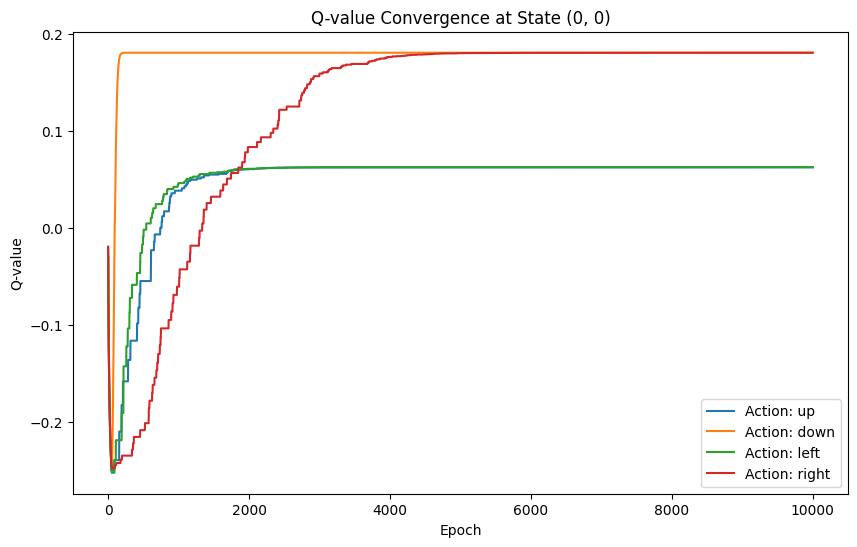

In [137]:
# Plot the convergence of Q-values for a specific state (e.g., (0, 0))
Plot_convergenceOfQValues(historyPlotValueQ, (0, 0))